# Bike Sharing - Machine Learning Project

### Problem definition :

- Predict hourly bike rental demand (cnt) from calendar and weather features to help optimize staffing, bike distribution, and promotions.

In [4]:
import pandas as pd

In [28]:
df_hour = pd.read_csv("hour.csv")

In [30]:
pd.set_option("display.max_columns", None)  
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [36]:
df_hour.shape

(17379, 17)

In [38]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

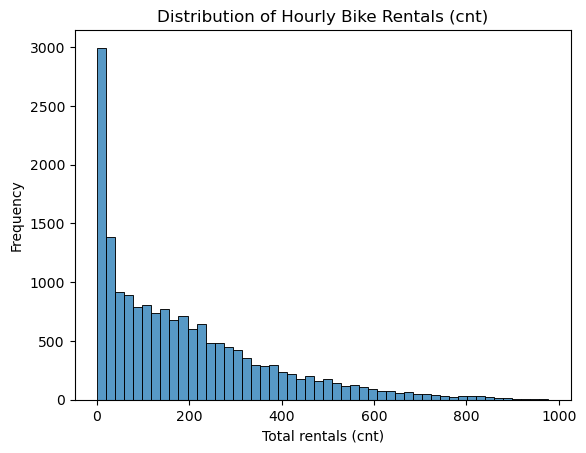

Mean: 189.46308763450142
Median: 142.0
Min: 1
Max: 977


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable

sns.histplot(df["cnt"], bins=50)

plt.title("Distribution of Hourly Bike Rentals (cnt)")
plt.xlabel("Total rentals (cnt)")
plt.ylabel("Frequency")

plt.show()

print("Mean:", df_hour["cnt"].mean())
print("Median:", df_hour["cnt"].median())
print("Min:", df_hour["cnt"].min())
print("Max:", df_hour["cnt"].max())


In [73]:

X_hour = df_hour.drop(columns=["instant", "dteday", "casual", "registered", "cnt"])

y_hour = df_hour["cnt"]


In [75]:
print("Features shape:", X_hour.shape)
print("Target shape:", y_hour.shape)
print("\nFeature columns:")
print(X_hour.columns.tolist())

Features shape: (17379, 12)
Target shape: (17379,)

Feature columns:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [55]:
from sklearn.model_selection import train_test_split

Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_hour, y_hour, test_size=0.2, random_state=42)

print("Train size:", Xh_train.shape, "Test size:", Xh_test.shape)

Train size: (13903, 12) Test size: (3476, 12)


In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

numeric_features = ["temp", "atemp", "hum", "windspeed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)


preprocessor.fit(Xh_train)


Xh_train_transformed = preprocessor.transform(Xh_train)

Xh_test_transformed = preprocessor.transform(Xh_test)

print("Transformed train shape:", Xh_train_transformed.shape)
print("\nTransformed test shape:", Xh_test_transformed.shape)


Transformed train shape: (13903, 61)

Transformed test shape: (3476, 61)


#### Model 1 : Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


yh_pred_baseline = np.repeat(yh_train.mean(), len(yh_test))

baseline_mae = mean_absolute_error(yh_test, yh_pred_baseline)

print("Baseline MAE:", baseline_mae)


lin_reg = LinearRegression()


lin_reg.fit(Xh_train_transformed, yh_train)


yh_pred_lin = lin_reg.predict(Xh_test_transformed)


mae = mean_absolute_error(yh_test, yh_pred_lin)

rmse = np.sqrt(mean_squared_error(yh_test, yh_pred_lin))

r2 = r2_score(yh_test, yh_pred_lin)

print("\nLinear Regression Results:")
print("\nMAE:", mae)
print("\nRMSE:", rmse)
print("\nR²:", r2)

Baseline MAE: 140.07983470382123

Linear Regression Results:

MAE: 74.10513531761272

RMSE: 100.44592801797558

R²: 0.681375228378091


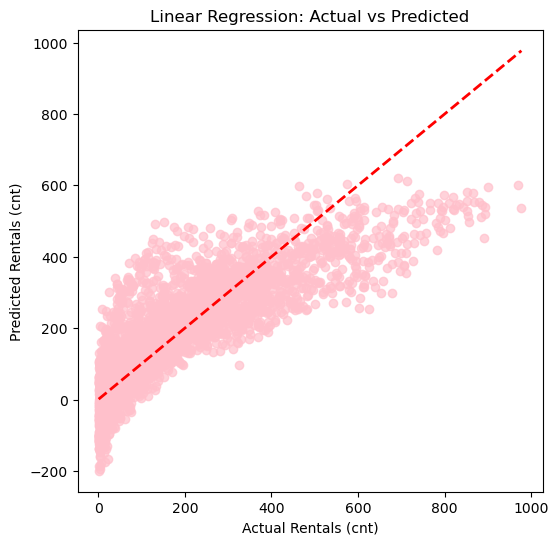

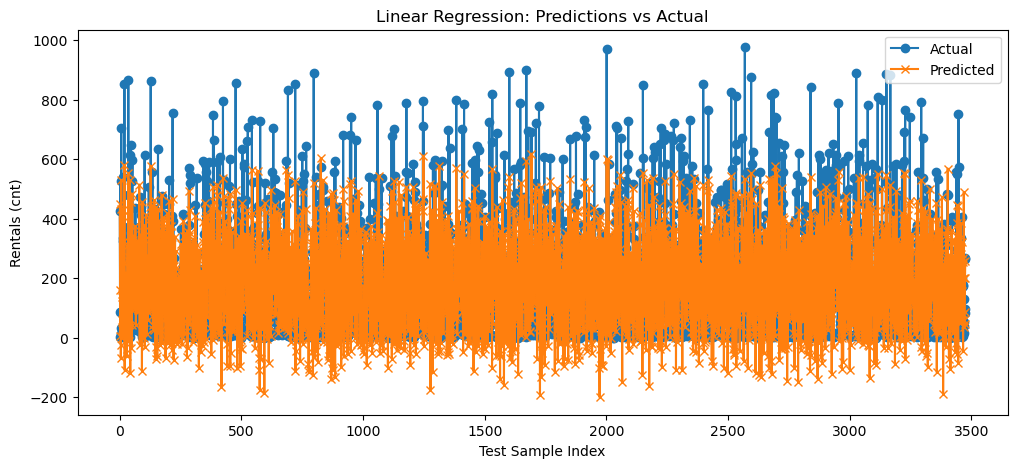

In [177]:
import matplotlib.pyplot as plt

# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(yh_test, yh_pred_lin, alpha=0.7, color="pink")
plt.plot([yh_test.min(), yh_test.max()], [yh_test.min(), yh_test.max()], "r--", lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Linear Regression: Actual vs Predicted")

plt.savefig("LR_actual_vs_pred.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

# Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(yh_test.values, label="Actual", marker='o')
plt.plot(yh_pred_lin, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Linear Regression: Predictions vs Actual")
plt.legend()

plt.show()

#### Model 2 : Random Forest Regression

In [81]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42, n_estimators=100)


rf.fit(Xh_train_transformed, yh_train)


yh_pred_rf = rf.predict(Xh_test_transformed)


mae_rf = mean_absolute_error(yh_test, yh_pred_rf)

rmse_rf = np.sqrt(mean_squared_error(yh_test, yh_pred_rf))

r2_rf = r2_score(yh_test, yh_pred_rf)

print("Random Forest Results:")
print("\nMAE:", mae_rf)
print("\nRMSE:", rmse_rf)
print("\nR²:", r2_rf)


Random Forest Results:

MAE: 29.785936756808592

RMSE: 47.83378579333825

R²: 0.9277422598743037


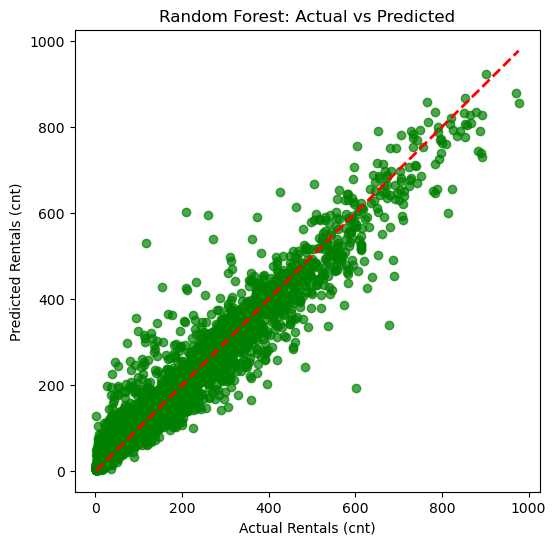

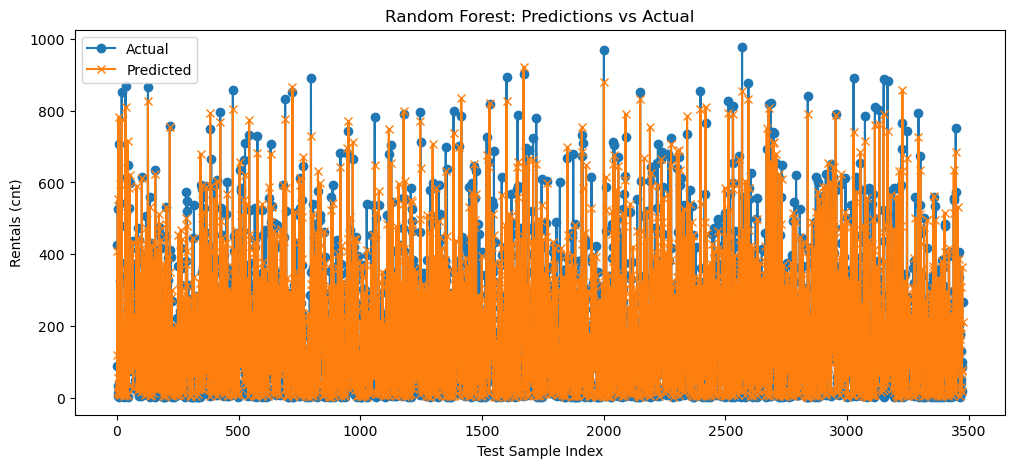

In [179]:
# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(yh_test, yh_pred_rf, alpha=0.7, color="green")
plt.plot([yh_test.min(), yh_test.max()], [yh_test.min(), yh_test.max()], "r--", lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Random Forest: Actual vs Predicted")

plt.savefig("RF_actual_vs_pred.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

#  Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(yh_test.values, label="Actual", marker='o')
plt.plot(yh_pred_rf, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()

plt.show()

#### Model 3 : Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(Xh_train_transformed, yh_train)

yh_pred_dt = dt.predict(Xh_test_transformed)


mae_dt = mean_absolute_error(yh_test, yh_pred_dt)

rmse_dt = np.sqrt(mean_squared_error(yh_test, yh_pred_dt))

r2_dt = r2_score(yh_test, yh_pred_dt)


print("Decision Tree Results:")
print("\nMAE:", mae_dt)
print("\nRMSE:", rmse_dt)
print("\nR²:", r2_dt)


Decision Tree Results:

MAE: 39.96849827387802

RMSE: 66.16524639313808

R²: 0.8617469457842027


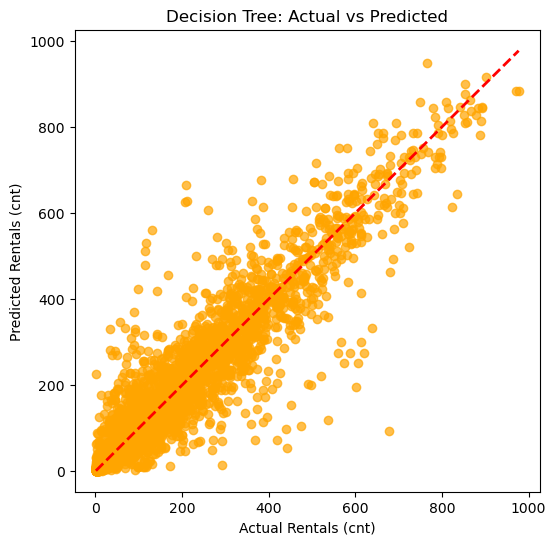

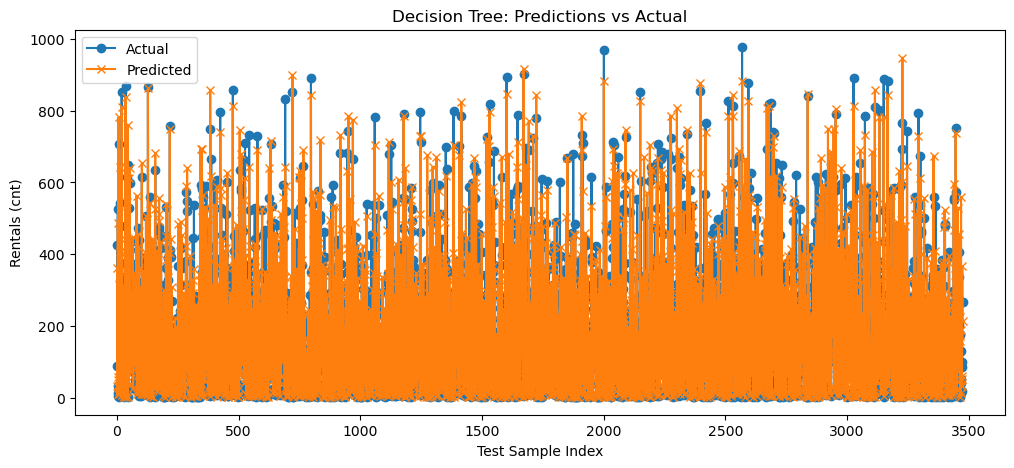

In [181]:
# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(yh_test, yh_pred_dt, alpha=0.7, color="orange")
plt.plot([yh_test.min(), yh_test.max()], [yh_test.min(), yh_test.max()], "r--", lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Decision Tree: Actual vs Predicted")

plt.savefig("DT_actual_vs_pred.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

#  Line Plot: Actual vs Predicted over Test Set

plt.figure(figsize=(12,5))

plt.plot(yh_test.values, label="Actual", marker='o')
plt.plot(yh_pred_dt, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Decision Tree: Predictions vs Actual")
plt.legend()

plt.show()

#### Model 4 : Gradient Boosting Regressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)


gbr.fit(Xh_train_transformed, yh_train)


yh_pred_gbr = gbr.predict(Xh_test_transformed)


mae_gbr = mean_absolute_error(yh_test, yh_pred_gbr)

rmse_gbr = np.sqrt(mean_squared_error(yh_test, yh_pred_gbr))

r2_gbr = r2_score(yh_test, yh_pred_gbr)

print("Gradient Boosting Regressor Results:")
print("\nMAE:", mae_gbr)
print("\nRMSE:", rmse_gbr)
print("\nR²:", r2_gbr)


Gradient Boosting Regressor Results:

MAE: 46.85357262256073

RMSE: 66.36943985234433

R²: 0.860892299818555


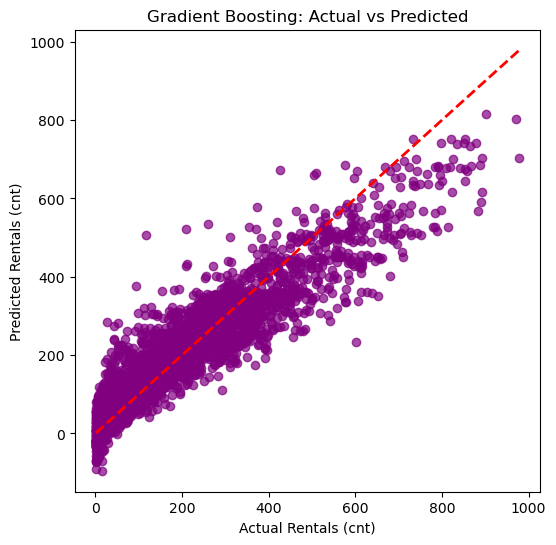

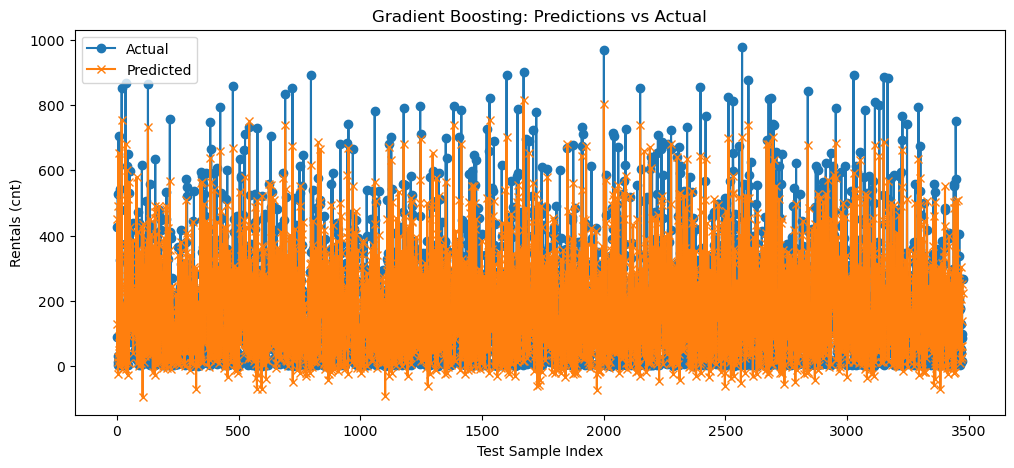

In [183]:
#  Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(yh_test, yh_pred_gbr, alpha=0.7, color="purple")
plt.plot([yh_test.min(), yh_test.max()], [yh_test.min(), yh_test.max()], "r--", lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Gradient Boosting: Actual vs Predicted")

plt.savefig("GBR_actual_vs_pred.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

# Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(yh_test.values, label="Actual", marker='o')
plt.plot(yh_pred_gbr, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Gradient Boosting: Predictions vs Actual")
plt.legend()

plt.show()




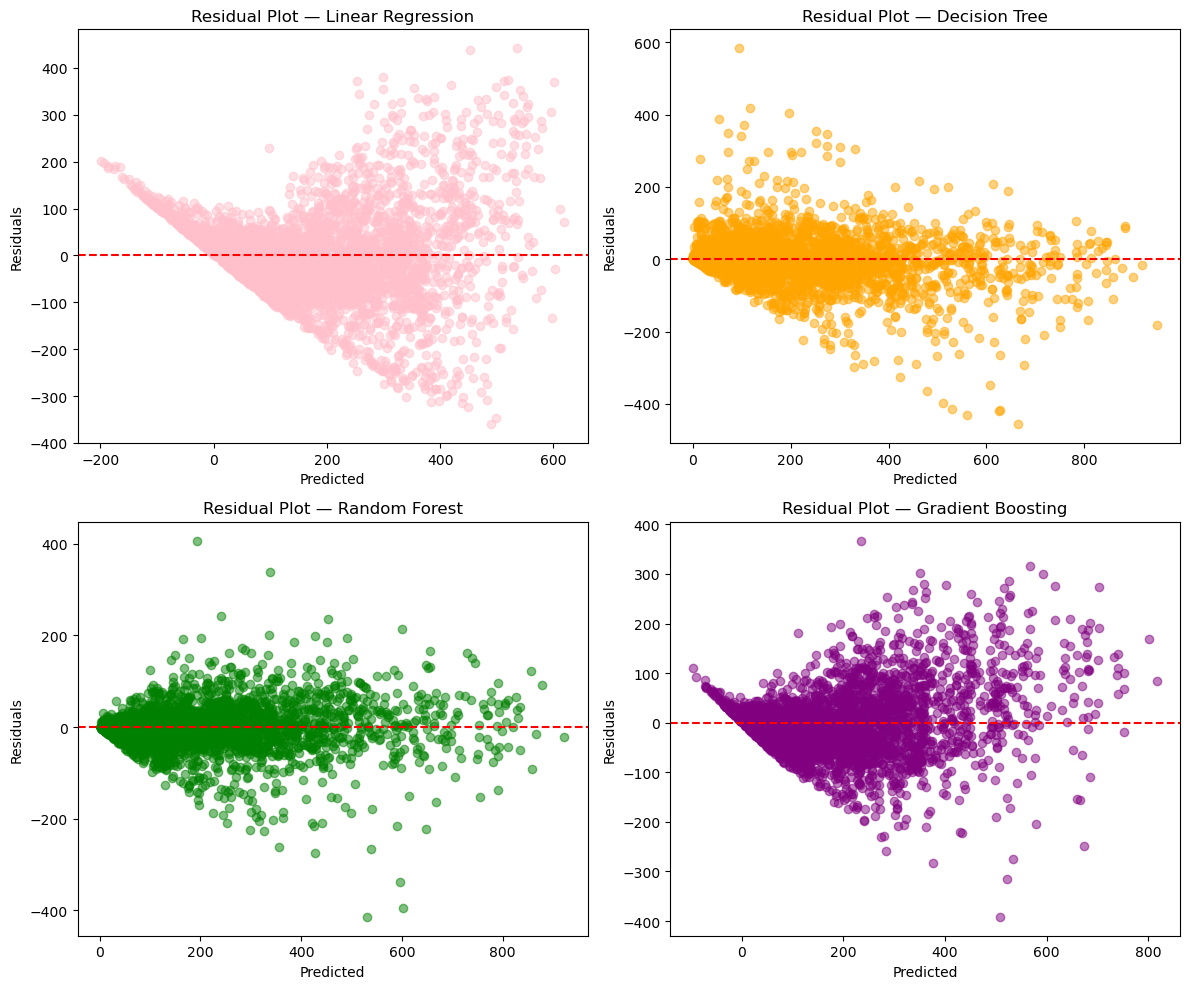

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

# Store predictions + actuals in pandas

results = pd.DataFrame({
    "Actual": yh_test,
    "Pred_Linear": yh_pred_lin,
    "Pred_DT": yh_pred_dt,
    "Pred_RF": yh_pred_rf,
    "Pred_GBR": yh_pred_gbr
})

# Compute residuals

results["Residuals_Linear"] = results["Actual"] - results["Pred_Linear"]
results["Residuals_DT"] = results["Actual"] - results["Pred_DT"]
results["Residuals_RF"] = results["Actual"] - results["Pred_RF"]
results["Residuals_GBR"] = results["Actual"] - results["Pred_GBR"]



fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Linear Regression

axes[0,0].scatter(results["Pred_Linear"], results["Residuals_Linear"], alpha=0.5, color="pink")
axes[0,0].axhline(y=0, color="red", linestyle="--")
axes[0,0].set_title("Residual Plot — Linear Regression")
axes[0,0].set_xlabel("Predicted")
axes[0,0].set_ylabel("Residuals")

# Decision Tree

axes[0,1].scatter(results["Pred_DT"], results["Residuals_DT"], alpha=0.5, color="orange")
axes[0,1].axhline(y=0, color="red", linestyle="--")
axes[0,1].set_title("Residual Plot — Decision Tree")
axes[0,1].set_xlabel("Predicted")
axes[0,1].set_ylabel("Residuals")

# Random Forest

axes[1,0].scatter(results["Pred_RF"], results["Residuals_RF"], alpha=0.5, color="green")
axes[1,0].axhline(y=0, color="red", linestyle="--")
axes[1,0].set_title("Residual Plot — Random Forest")
axes[1,0].set_xlabel("Predicted")
axes[1,0].set_ylabel("Residuals")

# Gradient Boosting

axes[1,1].scatter(results["Pred_GBR"], results["Residuals_GBR"], alpha=0.5, color="purple")
axes[1,1].axhline(y=0, color="red", linestyle="--")
axes[1,1].set_title("Residual Plot — Gradient Boosting")
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Residuals")

# Save the figure as PNG with transparent background

fig.savefig("residuals_comparison.png", dpi=300, bbox_inches="tight", transparent=True)


plt.tight_layout()

plt.show()


### Hourly Dataset Train Results

| Model                 | MAE ↓    | RMSE ↓   | R² ↑     |
| --------------------- | -------- | -------- | -------- |
| **Baseline (mean)**   | 140.1    | —        | —        |
| **Linear Regression** | 74.1     | 100.4    | 0.68     |
| **Decision Tree**     | 40.0     | 66.2     | 0.86     |
| **Random Forest**     | **29.8** | **47.8** | **0.93** |
| **Gradient Boosting** | 46.9     | 66.4     | 0.86     |



#### Random Forest — GridSearchCV (5-fold, optimize MAE)

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



categorical_features = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
numeric_features = ["temp", "atemp", "hum", "windspeed"]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")), # Preprocessor: imputer (if missing)
            ("scaler", StandardScaler())
        ]), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


rf = RandomForestRegressor(random_state=42)

pipe = Pipeline(steps=[("pre", preprocessor), ("rf", rf)])


param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2],
    "rf__max_features": ['sqrt', 'log2']
}

# GridSearchCV
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

grid.fit(Xh_train, yh_train)

print("Best CV score (MAE):", -grid.best_score_)
print("\nBest params:", grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best CV score (MAE): 42.08044236699129

Best params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [120]:
# Final test evaluation

best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(Xh_test)

mae = mean_absolute_error(yh_test, y_pred_rf)

rmse = np.sqrt(mean_squared_error(yh_test, y_pred_rf))

r2 = r2_score(yh_test, y_pred_rf)

print("\nRandom Forest — Test set:")
print("\nMAE:", mae)
print("\nRMSE:", rmse)
print("\nR²:", r2)



Random Forest — Test set:

MAE: 38.43112563530879

RMSE: 54.45066135192804

R²: 0.9063686717927185


#### Decision Tree Regressor — GridSearchCV (5-fold, optimize MAE)

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dt_pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

param_grid_dt = {
    "model__max_depth": [None, 8, 12, 16, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5],
    "model__max_features": [None, "sqrt", "log2"]
}

grid_dt = GridSearchCV(
    estimator=dt_pipe,
    param_grid=param_grid_dt,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid_dt.fit(Xh_train, yh_train)

print("Best DT params:", grid_dt.best_params_)
print("\nBest 5-fold CV MAE (DT):", -grid_dt.best_score_)


Best DT params: {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}

Best 5-fold CV MAE (DT): 41.32057923633867


In [114]:
# Evaluate best DT on test

best_dt = grid_dt.best_estimator_

y_pred_dt_tuned = best_dt.predict(Xh_test)

mae_dt = mean_absolute_error(yh_test, y_pred_dt_tuned)

rmse_dt = np.sqrt(mean_squared_error(yh_test, y_pred_dt_tuned))

r2_dt = r2_score(yh_test, y_pred_dt_tuned)

print("\nDecision Tree — Test set:")
print("\nMAE:", mae_dt)
print("\nRMSE:", rmse_dt)
print("\nR²:", r2_dt)



Decision Tree — Test set:

MAE: 37.25499057025956

RMSE: 62.368401425077465

R²: 0.8771587883388328


#### Gradient Boosting Regressor — GridSearchCV (5-fold, optimize MAE)

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


gbr_pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

param_grid_gbr = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [2, 3, 4],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_gbr = GridSearchCV(
    estimator=gbr_pipe,
    param_grid=param_grid_gbr,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid_gbr.fit(Xh_train, yh_train)

print("Best GBR params:", grid_gbr.best_params_)
print("\nBest 5-fold CV MAE (GBR):", -grid_gbr.best_score_)


Best GBR params: {'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}

Best 5-fold CV MAE (GBR): 31.711294297216046


In [140]:
# Evaluate best GBR on test

best_gbr = grid_gbr.best_estimator_

y_pred_gbr_tuned = best_gbr.predict(Xh_test)

mae_gbr = mean_absolute_error(yh_test, y_pred_gbr_tuned)

rmse_gbr = np.sqrt(mean_squared_error(yh_test, y_pred_gbr_tuned))

r2_gbr = r2_score(yh_test, y_pred_gbr_tuned)

print("\nGradient Boosting — Test set:")
print("\nMAE:", mae_gbr)
print("\nRMSE:", rmse_gbr)
print("\nR²:", r2_gbr)


Gradient Boosting — Test set:

MAE: 30.623706728559977

RMSE: 46.693610571214826

R²: 0.9311459041220137


#### Final Results Hourly Dataset (after GridSearchCV + 5 fold CV) 

| Model                 | Best Parameters                                                                                  | CV MAE ↓ | Test MAE ↓ | Test RMSE ↓ | Test R² ↑ |
| --------------------- | ------------------------------------------------------------------------------------------------ | --------  | ---------- | ----------- | --------- |
| **Decision Tree**     |  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10                     |   41.3    | 37.3       | 62.4        | 0.88      |
| **Random Forest**     |  n_estimators=200, max_depth=None, max_features='sqrt', min_samples_split=2, min_samples_leaf=1  |   42.1    | 38.4       | 54.5        | 0.91      |
| **Gradient Boosting** |  n_estimators=300, learning_rate=0.2, max_depth=4, min_samples_split=5, min_samples_leaf=1       |  **30.6** | **30.6**   | **46.7**    | **0.93**  |


In [185]:
from joblib import dump

dump(best_gbr, "gbr_hourly_pipeline.joblib")

print("Saved: gbr_hourly_pipeline.joblib")

Saved: gbr_hourly_pipeline.joblib
